# AgeTech Data Visualization

This notebook will help you visualize the results after running the pipeline.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set style
plt.style.use("default")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the synthetic dataset
try:
    df = pd.read_csv("data/raw/agetch_synthetic_data_20250823_145149.csv")
    print(f"Dataset loaded! Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
except FileNotFoundError:
    print("Dataset not found. Please run the pipeline first.")
    print("Run: python run_pipeline.py")

Dataset loaded! Shape: (500, 25)
Columns: ['participant_id', 'age_group', 'socioeconomic_status', 'living_situation', 'cognitive_status', 'physical_mobility', 'hearing_vision_impairment', 'chronic_conditions', 'medication_effects', 'caregiver_support', 'social_engagement', 'digital_literacy', 'internet_access', 'attitude_toward_technology', 'previous_tech_use', 'agetch_experience', 'tech_assistance_availability', 'willingness_new_tech', 'device_preferences', 'digital_willingness_interaction', 'cognitive_assistance_interaction', 'social_caregiver_interaction', 'technology_readiness_index', 'health_risk_score', 'adoption_success']


In [3]:
# Basic dataset info
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData Types:")
print(df.dtypes)
print(f"\nMissing Values:")
print(df.isnull().sum())
print(f"\nFirst few rows:")
display(df.head())

=== DATASET OVERVIEW ===
Shape: (500, 25)

Data Types:
participant_id                       int64
age_group                           object
socioeconomic_status                object
living_situation                    object
cognitive_status                    object
physical_mobility                   object
hearing_vision_impairment           object
chronic_conditions                  object
medication_effects                  object
caregiver_support                   object
social_engagement                   object
digital_literacy                    object
internet_access                     object
attitude_toward_technology          object
previous_tech_use                   object
agetch_experience                   object
tech_assistance_availability        object
willingness_new_tech                object
device_preferences                  object
digital_willingness_interaction      int64
cognitive_assistance_interaction     int64
social_caregiver_interaction         int64

,participant_id,age_group,socioeconomic_status,living_situation,cognitive_status,physical_mobility,hearing_vision_impairment,chronic_conditions,medication_effects,caregiver_support,...,agetch_experience,tech_assistance_availability,willingness_new_tech,device_preferences,digital_willingness_interaction,cognitive_assistance_interaction,social_caregiver_interaction,technology_readiness_index,health_risk_score,adoption_success
0,1,65-74,Medium,Independent Living,No Impairment,Independent,Moderate,2-3,NaN,Informal Only,...,NaN,Limited,Medium,Standard,0,0,0,10,3,0
1,2,85+,Medium,Independent Living,No Impairment,Independent,Moderate,4+,Moderate,Both,...,NaN,Readily Available,Medium,Simple,0,1,0,7,4,1
2,3,75-84,Medium,Nursing Home,No Impairment,Full Assistance,Mild,0-1,Significant,Formal Only,...,Moderate,NaN,Low,Simple,0,0,0,11,3,1
3,4,75-84,High,Assisted Living,No Impairment,Independent,Severe,2-3,NaN,NaN,...,Moderate,NaN,High,Advanced,0,0,0,10,4,1
4,5,65-74,Medium,Nursing Home,No Impairment,Independent,NaN,2-3,Moderate,NaN,...,NaN,Limited,Medium,Simple,0,0,0,9,1,0


=== TARGET VARIABLE ANALYSIS ===
Adoption Success Distribution:
adoption_success
1    281
0    219
Name: count, dtype: int64

Adoption Rate: 56.20%


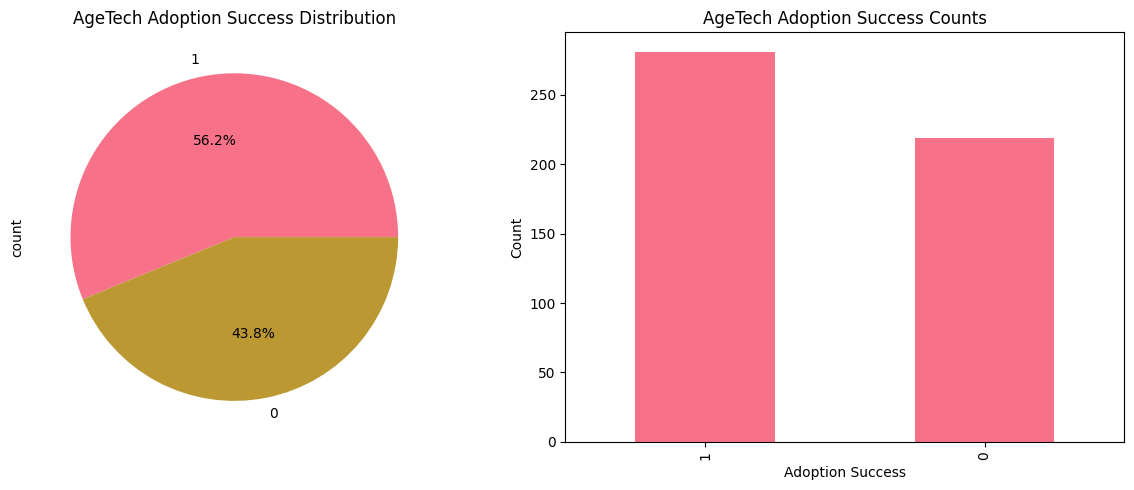

In [4]:
# Target variable analysis
print("=== TARGET VARIABLE ANALYSIS ===")
print(f"Adoption Success Distribution:")
print(df["adoption_success"].value_counts())
print(f"\nAdoption Rate: {df['adoption_success'].mean():.2%}")

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

df["adoption_success"].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=ax1)
ax1.set_title("AgeTech Adoption Success Distribution")

df["adoption_success"].value_counts().plot(kind="bar", ax=ax2)
ax2.set_title("AgeTech Adoption Success Counts")
ax2.set_xlabel("Adoption Success")
ax2.set_ylabel("Count")

plt.tight_layout()
plt.show()

=== DEMOGRAPHIC ANALYSIS ===


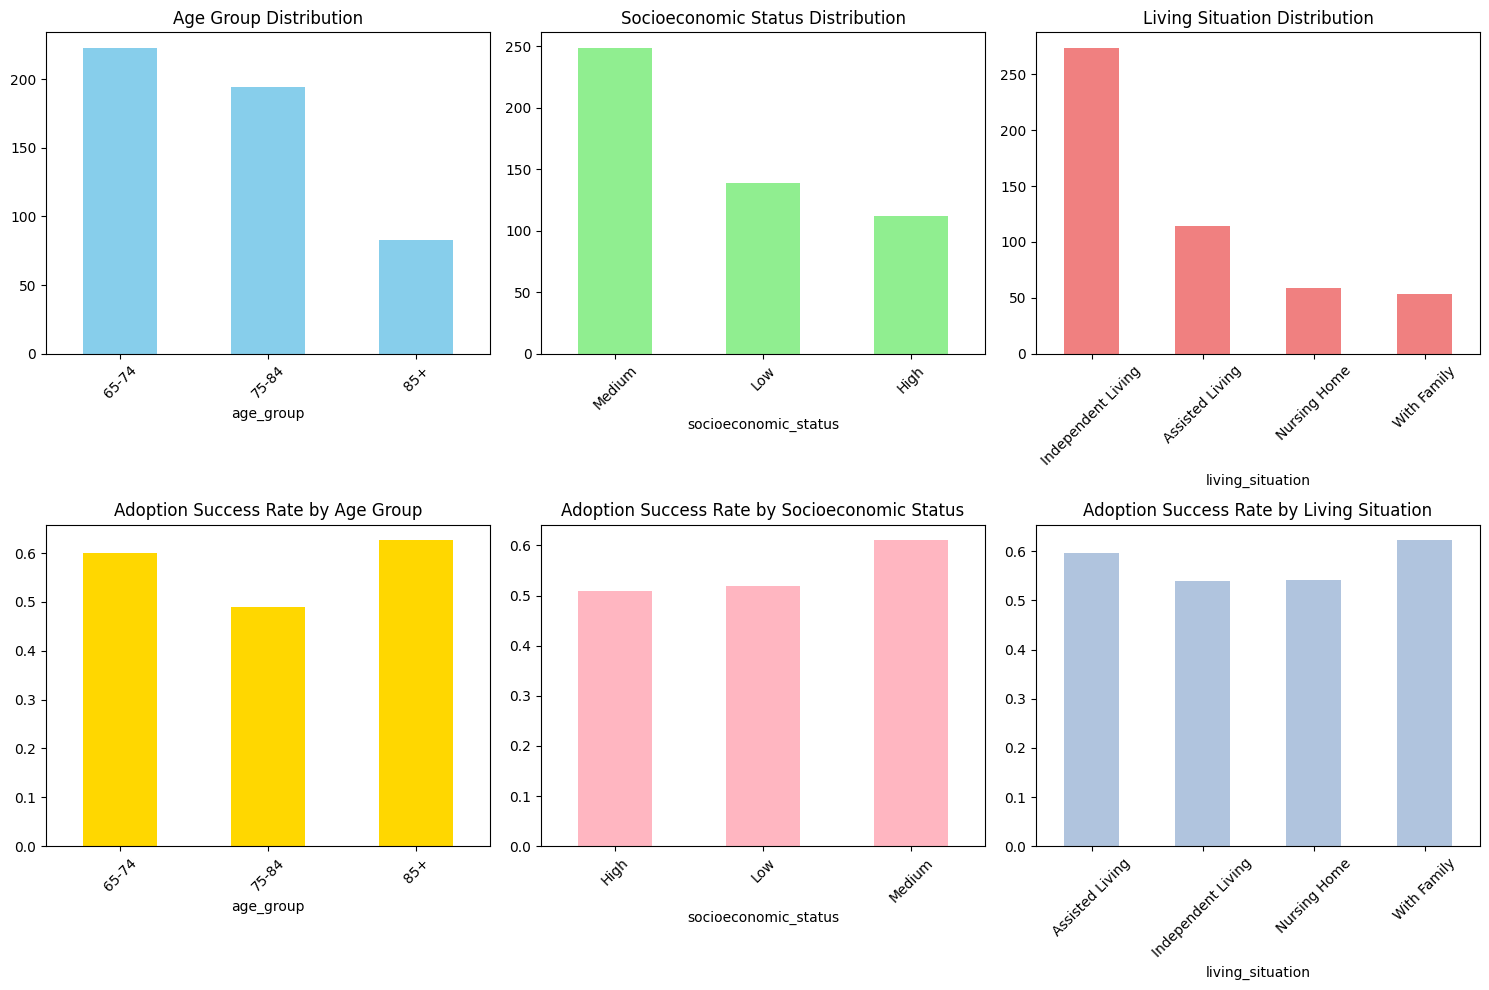

In [5]:
# Demographic analysis
print("=== DEMOGRAPHIC ANALYSIS ===")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Age group
df["age_group"].value_counts().plot(kind="bar", ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Age Group Distribution")
axes[0,0].tick_params(axis="x", rotation=45)

# Socioeconomic status
df["socioeconomic_status"].value_counts().plot(kind="bar", ax=axes[0,1], color="lightgreen")
axes[0,1].set_title("Socioeconomic Status Distribution")
axes[0,1].tick_params(axis="x", rotation=45)

# Living situation
df["living_situation"].value_counts().plot(kind="bar", ax=axes[0,2], color="lightcoral")
axes[0,2].set_title("Living Situation Distribution")
axes[0,2].tick_params(axis="x", rotation=45)

# Adoption by age group
df.groupby("age_group")["adoption_success"].mean().plot(kind="bar", ax=axes[1,0], color="gold")
axes[1,0].set_title("Adoption Success Rate by Age Group")
axes[1,0].tick_params(axis="x", rotation=45)

# Adoption by socioeconomic status
df.groupby("socioeconomic_status")["adoption_success"].mean().plot(kind="bar", ax=axes[1,1], color="lightpink")
axes[1,1].set_title("Adoption Success Rate by Socioeconomic Status")
axes[1,1].tick_params(axis="x", rotation=45)

# Adoption by living situation
df.groupby("living_situation")["adoption_success"].mean().plot(kind="bar", ax=axes[1,2], color="lightsteelblue")
axes[1,2].set_title("Adoption Success Rate by Living Situation")
axes[1,2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

=== TECHNOLOGY READINESS ANALYSIS ===


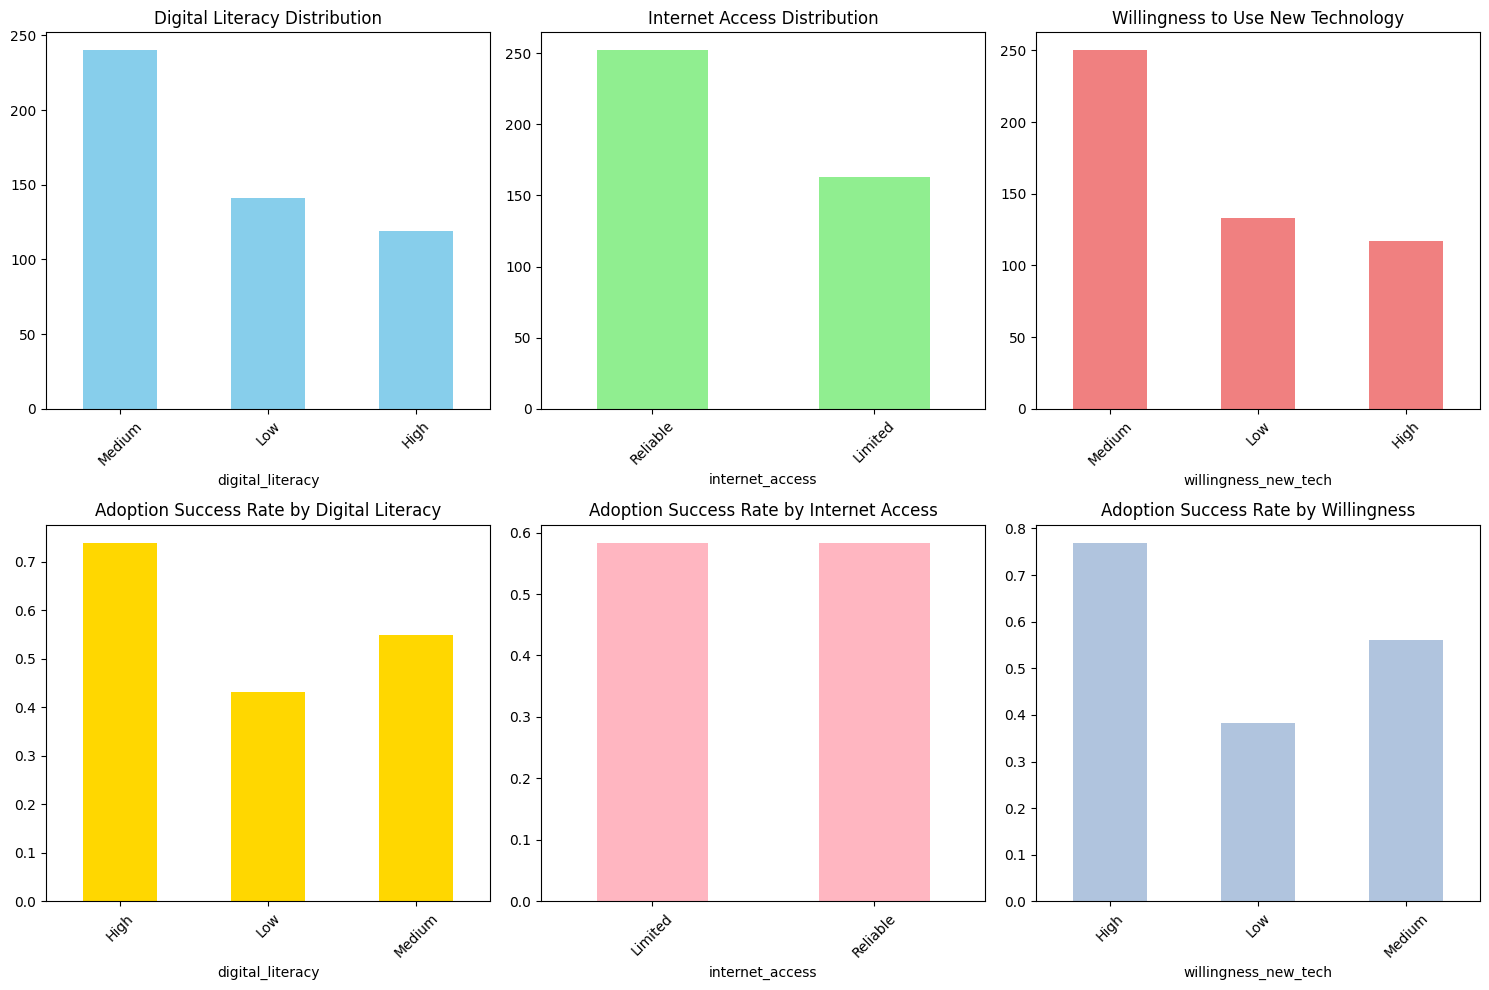

In [6]:
# Technology readiness analysis
print("=== TECHNOLOGY READINESS ANALYSIS ===")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Digital literacy
df["digital_literacy"].value_counts().plot(kind="bar", ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Digital Literacy Distribution")
axes[0,0].tick_params(axis="x", rotation=45)

# Internet access
df["internet_access"].value_counts().plot(kind="bar", ax=axes[0,1], color="lightgreen")
axes[0,1].set_title("Internet Access Distribution")
axes[0,1].tick_params(axis="x", rotation=45)

# Willingness to use new technology
df["willingness_new_tech"].value_counts().plot(kind="bar", ax=axes[0,2], color="lightcoral")
axes[0,2].set_title("Willingness to Use New Technology")
axes[0,2].tick_params(axis="x", rotation=45)

# Adoption by digital literacy
df.groupby("digital_literacy")["adoption_success"].mean().plot(kind="bar", ax=axes[1,0], color="gold")
axes[1,0].set_title("Adoption Success Rate by Digital Literacy")
axes[1,0].tick_params(axis="x", rotation=45)

# Adoption by internet access
df.groupby("internet_access")["adoption_success"].mean().plot(kind="bar", ax=axes[1,1], color="lightpink")
axes[1,1].set_title("Adoption Success Rate by Internet Access")
axes[1,1].tick_params(axis="x", rotation=45)

# Adoption by willingness
df.groupby("willingness_new_tech")["adoption_success"].mean().plot(kind="bar", ax=axes[1,2], color="lightsteelblue")
axes[1,2].set_title("Adoption Success Rate by Willingness")
axes[1,2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

=== CORRELATION ANALYSIS ===


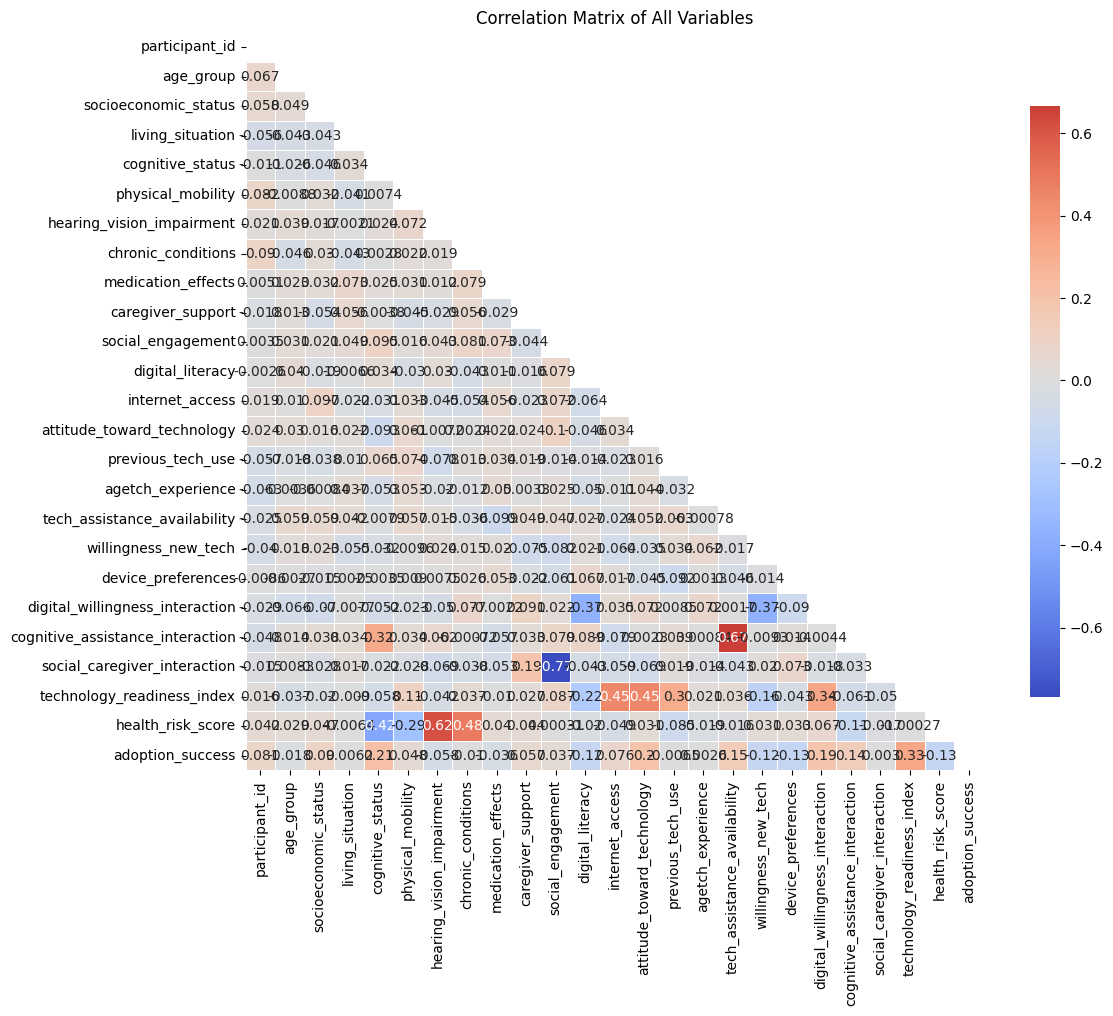


Top 10 correlations with adoption_success:
adoption_success                    1.000000
technology_readiness_index          0.331286
cognitive_status                    0.212250
attitude_toward_technology          0.195902
digital_willingness_interaction     0.193086
tech_assistance_availability        0.149458
cognitive_assistance_interaction    0.137649
device_preferences                  0.132088
health_risk_score                   0.129261
willingness_new_tech                0.122488
digital_literacy                    0.119148
Name: adoption_success, dtype: float64


In [7]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")

# Convert categorical to numerical
df_numeric = df.copy()
categorical_columns = df.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    df_numeric[col] = pd.Categorical(df_numeric[col]).codes

# Correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of All Variables")
plt.tight_layout()
plt.show()

# Top correlations with adoption_success
print("\nTop 10 correlations with adoption_success:")
adoption_corr = correlation_matrix["adoption_success"].abs().sort_values(ascending=False)
print(adoption_corr.head(11))

=== KEY FINDINGS SUMMARY ===

Top 5 predictors of AgeTech adoption:
- technology_readiness_index: 0.331
- cognitive_status: 0.212
- attitude_toward_technology: 0.196
- digital_willingness_interaction: 0.193
- tech_assistance_availability: 0.149


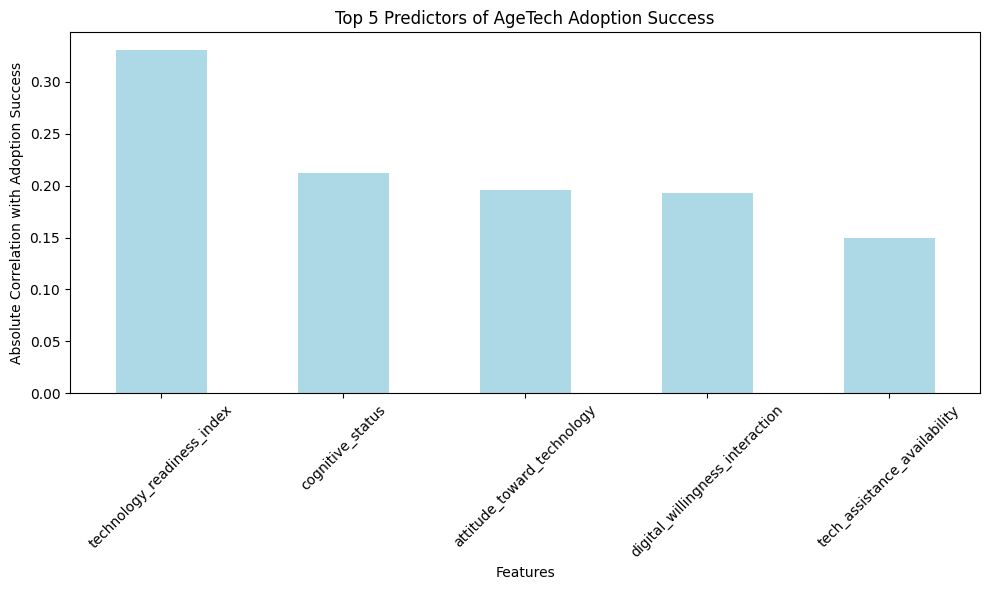


=== EDA COMPLETE ===
This analysis shows the key factors influencing AgeTech adoption.


In [8]:
# Summary of key findings
print("=== KEY FINDINGS SUMMARY ===")

# Top predictors
top_predictors = adoption_corr.head(11)[1:6]  # Exclude adoption_success itself
print("\nTop 5 predictors of AgeTech adoption:")
for feature, corr in top_predictors.items():
    print(f"- {feature}: {corr:.3f}")

# Create bar plot
plt.figure(figsize=(10, 6))
top_predictors.plot(kind="bar", color="lightblue")
plt.title("Top 5 Predictors of AgeTech Adoption Success")
plt.xlabel("Features")
plt.ylabel("Absolute Correlation with Adoption Success")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n=== EDA COMPLETE ===")
print("This analysis shows the key factors influencing AgeTech adoption.")